In [2]:
# https://www.kaggle.com/code/satarupadeb/na-ve-bayes-classification-spam-email-detection

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv(
    '/Users/songjunwoo/Documents/ai/Datasets/spam.csv', 
    encoding='latin-1'
)

In [20]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [22]:
# v1(y): ham=일반 메일, spam=스팸메일
# v1(X): 이메일 본문
# Unnamed 2~4: 쓰레기값

In [26]:
# 사용하지 않는 특성 제거하기
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [28]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
# Columns 이름 바꾸기
data.columns = ['label', 'text']
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
X = data.drop('label', axis=1)
X.head()

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
y = data['label']
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [49]:
# 훈련셋, 테스트셋 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1234
)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
# MultinomialNB는 문자열을 처리할 수 없음
# CountVectorizer는 문장에서 단어를 추출하고 각 단어의 빈도수를 카운트하여 Matrix를 만들어줌
vectorizer = CountVectorizer()

In [105]:
# 훈련 셋트로 학습시키고 vector로 변환된 값 가져오기
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# 테스트 세트는 변환만 시킴
X_test_vectorized = vectorizer.transform(X_test['text'])

print(X_train_vectorized.shape, X_train.shape)
print(X_test_vectorized.shape, X_test.shape)

(4457, 7676) (4457, 1)
(1115, 7676) (1115, 1)


In [107]:
# 학습시키기
cls = MultinomialNB()
cls.fit(X_train_vectorized, y_train)

MultinomialNB()

In [109]:
# 테스트셋으로 예측
preds = cls.predict(X_test_vectorized)

accr = accuracy_score(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)
cls_report = classification_report(y_test, preds)

print(f'Accuracy: {accr:.2f}')

print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(cls_report)

Accuracy: 0.99
Confusion Matrix:
[[940   3]
 [ 12 160]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       943
        spam       0.98      0.93      0.96       172

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [121]:
# confusion_matrix
# 정답 클래스가 0이며 0으로 예측한 수 960개
# 정답 클래스가 1이며 1로 예측한 수 160번
print(940 + 3 + 12 +160)
print(X_test_vectorized.shape[0])

1115
1115


In [126]:
# 시각화
import matplotlib.pyplot as plt

In [134]:
spam_counts = y_test.value_counts()
print(type(spam_counts))
print(spam_counts)

<class 'pandas.core.series.Series'>
label
ham     943
spam    172
Name: count, dtype: int64


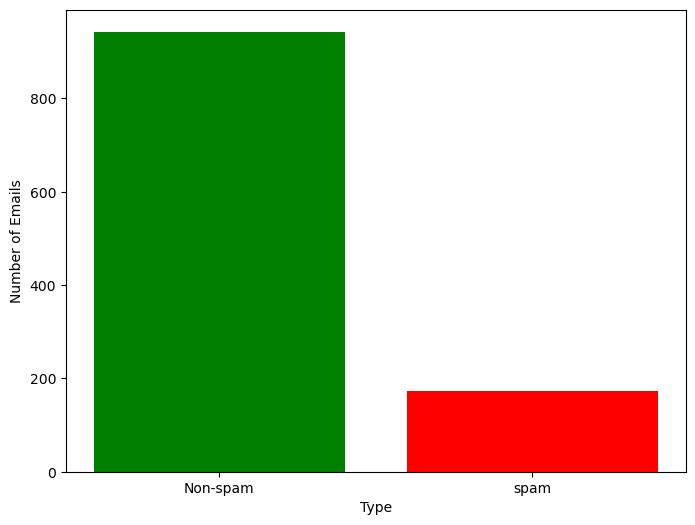

In [136]:
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Type')
plt.ylabel('Number of Emails')
plt.xticks([0,1], ['Non-spam', 'spam'])
plt.show()